In [1]:
import numpy as np
import matplotlib.pyplot as plt

import renormalization as rg

In [2]:
RG = rg.RenormalizationGroup()
RG.Jc

0.065266294981

In [3]:
j, h = 1, 1e-5

RG.flow(j, h, 20)

k   J                H
______________________
0   1         1e-05
1   14.267132273170475         3.999999099590923e-05
2   56.72195547680194         0.00031999992796727383
3   226.5412466785303         0.0025599994237381907
4   905.8183082736177         0.020479995389905525
5   3622.9199784315992         0.1638399631192442
6   14490.989465321229         1.3107197049539536
7   57958.714982464706         10.485757639631629
8   231792.9168993003         83.88606111705303
9   926836.123352733         671.0884889364243
10   3704660.139455186         5368.707911491394
11   14797165.72617478         42949.66329193115
12   59016864.25153139         343597.3063354492
13   234693067.78078377         2748778.4506835938
14   927777157.3204007         21990227.60546875
15   3623147718.859728         175921820.84375
16   13788903592.063911         1407374566.75
17   49526116101.255646         11258996534.0
18   153068478269.02258         90071972272.0
19   251986023988.09033         720575778176.0
2

# Densities

In [5]:
h = 0
densities = RG.densities(h)

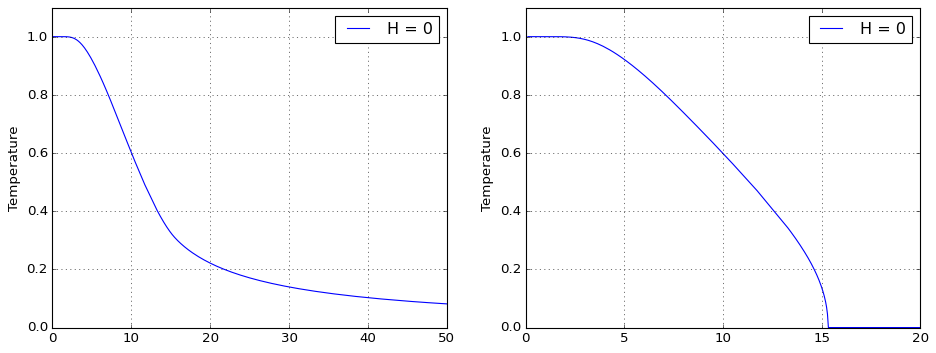

In [12]:
plt.style.use('classic')
fig = plt.figure(figsize=(14, 5))
fig.set_facecolor('none')

ax1 = plt.subplot(121)
ax1.plot(densities[0],  densities[1][:,1], label=f"H = {h}")
ax1.legend(loc=1)
ax1.grid()
ax1.axis([0,50, 0,1.1])
ax1.set_ylabel("Density")
ax1.set_ylabel("Temperature")


ax2 = plt.subplot(122)
ax2.plot(densities[0],  densities[1][:,2],  label="H = 0")
ax2.legend(loc=1)
ax2.grid()
ax2.axis([0,20, 0,1.1])
ax2.set_ylabel("Magnetization")
ax2.set_ylabel("Temperature")

plt.show()

In [3]:
def Droplet(j_input, h_input):
    
    M_results = []
    L_results = []
    
    Mn = [1, 1, -2]

    N = 15
    n = 0
    
    for k in range(N):
        j = j_input
        h = h_input
        
        U = np.identity(3)
       
        U = _eigen*np.dot(RecursionMatrix_1(j, h), U)
        j, h = J_1(j,h), H_1(j,h)
        
        for i in range(n):
            U = _eigen*np.dot(RecursionMatrix(j, h), U) 
            j, h = J(j,h), H(j,h)
        M = np.dot(Mn, U)

        M_results.append(M)
        L_results.append(2**(n+1))
        n = n+1

    return L_results, M_results

In [8]:
j = 1/5

h = [0.05, 0.5, 1, 1.5]

data_droplet0 = Droplet(j,h[0])
data_droplet1 = Droplet(j,h[1])
data_droplet2 = Droplet(j,h[2])
data_droplet3 = Droplet(j,h[3])
#data_droplet4 = Droplet(j,h[4])

C:\Users\Canpc\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


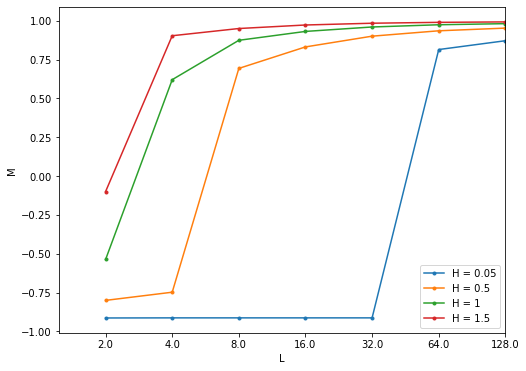

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

ax.plot(data_droplet0[0], [i[2] for i in data_droplet0[1]], label='H = '+str(h[0]), marker='.')
ax.plot(data_droplet1[0], [i[2] for i in data_droplet1[1]], label='H = '+str(h[1]), marker='.')
ax.plot(data_droplet2[0], [i[2] for i in data_droplet2[1]], label='H = '+str(h[2]), marker='.')
ax.plot(data_droplet3[0], [i[2] for i in data_droplet3[1]], label='H = '+str(h[3]), marker='.')
#ax.plot(data_droplet4[0], [i[2] for i in data_droplet4[1]], label='H = '+str(h[4]), marker='.')

plt.ylabel('M') 
plt.xlabel('L')
ax.set_xscale('log', basex=2)
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlim(0, 2**7)
ax.legend(loc=4)

plt.show()

In [6]:
def DropletCriticalSize(j_input):
    
    H_results = []
    L_results = []
    
    Mn = [1, 1, -2]
    
    c = -1
    for i in range(5):
        
        n = -1
        Ln = [0]
        while True:
            
            n = n+1
            Ln.append(n)
            
            j = j_input
            h = 1/(10**c)
            
            U = np.identity(3)
            U = _eigen*np.dot(RecursionMatrix_1(j_input,h), U)
            j, h = J_1(j_input,h), H_1(j_input,h)
            for i in range(n):
                U = _eigen*np.dot(RecursionMatrix(j,h), U)
                j, h = J(j,h), H(j,h)
            M = np.dot(Mn, U)
            
            if M[2] < 0:
                pass
            else:
                break       
            
        H_results.append(1/(10**c))
        L_results.append(decimation**((Ln[-1]+Ln[-2])/2+1))
        c = c+1
        
    return H_results, L_results

In [7]:
j = 1/5

data_criticaldropletsize = DropletCriticalSize(j)

In [9]:
((log(data_criticaldropletsize[1][-1]) - log(data_criticaldropletsize[1][-2]))/
(log(data_criticaldropletsize[0][-1]) - log(data_criticaldropletsize[0][-2])))

-0.9030899869919436

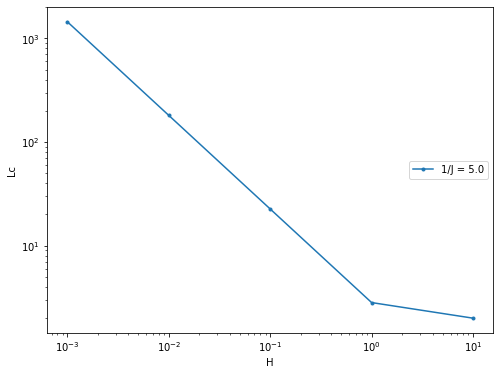

In [72]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

ax.plot(data_criticaldropletsize[0], data_criticaldropletsize[1], label='1/J = '+str(1/j), marker='.')

plt.ylabel("Lc")
plt.xlabel("H")
ax.set_yscale('log')
ax.set_xscale('log')
#ax.yaxis.set_major_formatter(ScalarFormatter())
#plt.xlim(0.5, 12)
#plt.ylim(0, 10)
ax.legend(loc=5)

plt.show()

In [96]:
def DropletCriticalH():
    
    T_results = []
    H_results = []
    
    Mn = [1, 1, -2]
    
    ji = 0.01
    while ji < 10:
        
        hi = 0     
        while True:
            
            j = ji
            h = hi
            
            U = np.identity(3)
            U = _eigen*np.dot(RecursionMatrix_1(j, h), U)
            M = np.dot(Mn, U)
            
            if M[2] < 0:
                pass
            else:
                break      
            
            hi = hi + 0.01
        
        H_results.append(hi)
        T_results.append(1/ji)
        ji = ji + 0.1
        
        
    return T_results, H_results

In [95]:
j = 0.01

print("J  H   M")
while j < 1:
    h = 0
    print("\n")
    while True:
    
        U = np.identity(3)
        U = _eigen*np.dot(RecursionMatrix_1(j, h), U)
        M = np.dot([1, 1, -2], U)
        
        if M[2] < 0:
                pass
        else:
            break      
            
        h = h + 0.1
        print(j, h, M[2])
        h = h+0.01
    j = j+0.01
    

J  H   M


0.01 0.1 -0.07982976734638214


0.02 0.1 -0.1586485058069229
0.02 0.21000000000000002 -0.0499583724886179


0.03 0.1 -0.23549574986100197
0.03 0.21000000000000002 -0.12927258387207985
0.03 0.32000000000000006 -0.019997334107756615


0.04 0.1 -0.30950692296028137
0.04 0.21000000000000002 -0.20696649514138699
0.04 0.32000000000000006 -0.09966799803078175


0.05 0.1 -0.3799489587545395
0.05 0.21000000000000002 -0.2821348048746586
0.05 0.32000000000000006 -0.1780808623880148
0.05 0.43000000000000005 -0.06988589093089104


0.060000000000000005 0.1 -0.44624361395835876
0.060000000000000005 0.21000000000000002 -0.353991711512208
0.060000000000000005 0.32000000000000006 -0.2542955353856087
0.060000000000000005 0.43000000000000005 -0.14888503588736057
0.060000000000000005 0.54 -0.03997867740690708


0.07 0.1 -0.5079774297773838
0.07 0.21000000000000002 -0.4218990094959736
0.07 0.32000000000000006 -0.3274773955345154
0.07 0.43000000000000005 -0.22602835297584534
0.07 0.54 -0.119427302

0.22000000000000006 1.2000000000000002 -0.5783634074032307
0.22000000000000006 1.3100000000000003 -0.5005202144384384
0.22000000000000006 1.4200000000000004 -0.4136444479227066
0.22000000000000006 1.5300000000000005 -0.31852079182863235
0.22000000000000006 1.6400000000000006 -0.2165180742740631
0.22000000000000006 1.7500000000000007 -0.10955846682190895


0.23000000000000007 0.1 -0.9507951438426971
0.23000000000000007 0.21000000000000002 -0.9390559308230877
0.23000000000000007 0.32000000000000006 -0.9246242232620716
0.23000000000000007 0.43000000000000005 -0.906939048320055
0.23000000000000007 0.54 -0.8853516466915607
0.23000000000000007 0.65 -0.8591265417635441
0.23000000000000007 0.76 -0.8274516146630049
0.23000000000000007 0.87 -0.7894612271338701
0.23000000000000007 0.98 -0.7442768663167953
0.23000000000000007 1.09 -0.6910694763064384
0.23000000000000007 1.2000000000000002 -0.6291451640427113
0.23000000000000007 1.3100000000000003 -0.5580522306263447
0.23000000000000007 1.420000000

0.3000000000000001 1.5300000000000005 -0.7487042732536793
0.3000000000000001 1.6400000000000006 -0.6962576806545258
0.3000000000000001 1.7500000000000007 -0.6351489685475826
0.3000000000000001 1.8600000000000008 -0.5648995451629162
0.3000000000000001 1.9700000000000009 -0.4853811003267765
0.3000000000000001 2.080000000000001 -0.39693043753504753
0.3000000000000001 2.190000000000001 -0.3004370853304863
0.3000000000000001 2.3000000000000007 -0.19737529754638672
0.3000000000000001 2.4100000000000006 -0.08975779265165329


0.3100000000000001 0.1 -0.9860718250274658
0.3100000000000001 0.21000000000000002 -0.982674140483141
0.3100000000000001 0.32000000000000006 -0.9784565418958664
0.3100000000000001 0.43000000000000005 -0.9732261560857296
0.3100000000000001 0.54 -0.9667472988367081
0.3100000000000001 0.65 -0.9587334021925926
0.3100000000000001 0.76 -0.9488384202122688
0.3100000000000001 0.87 -0.936647541821003
0.3100000000000001 0.98 -0.9216685518622398
0.3100000000000001 1.09 -0.9033247381

0.37000000000000016 0.65 -0.9839955419301987
0.37000000000000016 0.76 -0.9800964072346687
0.37000000000000016 0.87 -0.9752591699361801
0.37000000000000016 0.98 -0.9692645817995071
0.37000000000000016 1.09 -0.9618456140160561
0.37000000000000016 1.2000000000000002 -0.952678844332695
0.37000000000000016 1.3100000000000003 -0.9413755275309086
0.37000000000000016 1.4200000000000004 -0.927472572773695
0.37000000000000016 1.5300000000000005 -0.9104246012866497
0.37000000000000016 1.6400000000000006 -0.889598935842514
0.37000000000000016 1.7500000000000007 -0.8642754293978214
0.37000000000000016 1.8600000000000008 -0.8336546085774899
0.37000000000000016 1.9700000000000009 -0.7968781404197216
0.37000000000000016 2.080000000000001 -0.7530658952891827
0.37000000000000016 2.190000000000001 -0.7013741135597229
0.37000000000000016 2.3000000000000007 -0.6410769522190094
0.37000000000000016 2.4100000000000006 -0.5716699585318565
0.37000000000000016 2.5200000000000005 -0.4929879605770111
0.37000000000

0.4300000000000002 2.190000000000001 -0.8740532994270325
0.4300000000000002 2.3000000000000007 -0.8454555869102478
0.4300000000000002 2.4100000000000006 -0.8110192716121674
0.4300000000000002 2.5200000000000005 -0.769866518676281
0.4300000000000002 2.6300000000000003 -0.721132218837738
0.4300000000000002 2.74 -0.66403678804636
0.4300000000000002 2.85 -0.5979820117354393
0.4300000000000002 2.96 -0.522665411233902
0.4300000000000002 3.07 -0.43819931149482727
0.4300000000000002 3.1799999999999997 -0.34521404653787613
0.4300000000000002 3.2899999999999996 -0.24491862952709198
0.4300000000000002 3.3999999999999995 -0.13909247517585754
0.4300000000000002 3.5099999999999993 -0.029990993440151215


0.4400000000000002 0.1 -0.998249277472496
0.4400000000000002 0.21000000000000002 -0.9978189393877983
0.4400000000000002 0.32000000000000006 -0.9972829893231392
0.4400000000000002 0.43000000000000005 -0.996615469455719
0.4400000000000002 0.54 -0.9957844018936157
0.4400000000000002 0.65 -0.99474975466

0.49000000000000027 0.1 -0.9992129653692245
0.49000000000000027 0.21000000000000002 -0.9990193992853165
0.49000000000000027 0.32000000000000006 -0.9987782388925552
0.49000000000000027 0.43000000000000005 -0.9984778240323067
0.49000000000000027 0.54 -0.9981036260724068
0.49000000000000027 0.65 -0.9976374804973602
0.49000000000000027 0.76 -0.9970569908618927
0.49000000000000027 0.87 -0.9963341057300568
0.49000000000000027 0.98 -0.9954341053962708
0.49000000000000027 1.09 -0.9943137168884277
0.49000000000000027 1.2000000000000002 -0.9929194450378418
0.49000000000000027 1.3100000000000003 -0.9911847412586212
0.49000000000000027 1.4200000000000004 -0.9890274032950401
0.49000000000000027 1.5300000000000005 -0.9863457307219505
0.49000000000000027 1.6400000000000006 -0.9830142557621002
0.49000000000000027 1.7500000000000007 -0.9788786396384239
0.49000000000000027 1.8600000000000008 -0.9737493768334389
0.49000000000000027 1.9700000000000009 -0.9673949852585793
0.49000000000000027 2.080000000000

0.5300000000000002 2.74 -0.9216685518622398
0.5300000000000002 2.85 -0.903324767947197
0.5300000000000002 2.96 -0.8809512332081795
0.5300000000000002 3.07 -0.8537976741790771
0.5300000000000002 3.1799999999999997 -0.8210399150848389
0.5300000000000002 3.2899999999999996 -0.7818063572049141
0.5300000000000002 3.3999999999999995 -0.7352222576737404
0.5300000000000002 3.5099999999999993 -0.6804759725928307
0.5300000000000002 3.619999999999999 -0.6169093027710915
0.5300000000000002 3.729999999999999 -0.5441271215677261
0.5300000000000002 3.839999999999999 -0.46211712807416916
0.5300000000000002 3.949999999999999 -0.3713602125644684
0.5300000000000002 4.059999999999999 -0.2729051113128662
0.5300000000000002 4.169999999999998 -0.16838102042675018
0.5300000000000002 4.279999999999998 -0.05992811918258667


0.5400000000000003 0.1 -0.9996462762355804
0.5400000000000003 0.21000000000000002 -0.999559298157692
0.5400000000000003 0.32000000000000006 -0.9994508251547813
0.5400000000000003 0.43000000

0.5700000000000003 3.3999999999999995 -0.8510640934109688
0.5700000000000003 3.5099999999999993 -0.8177540972828865
0.5700000000000003 3.619999999999999 -0.7778880670666695
0.5700000000000003 3.729999999999999 -0.7305939197540283
0.5700000000000003 3.839999999999999 -0.6750699058175087
0.5700000000000003 3.949999999999999 -0.6106768250465393
0.5700000000000003 4.059999999999999 -0.5370495468378067
0.5700000000000003 4.169999999999998 -0.45421645045280457
0.5700000000000003 4.279999999999998 -0.3627074658870697
0.5700000000000003 4.389999999999997 -0.263624832034111
0.5700000000000003 4.4999999999999964 -0.15864849090576172
0.5700000000000003 4.609999999999996 -0.04995840787887573


0.5800000000000003 0.1 -0.9998134672641754
0.5800000000000003 0.21000000000000002 -0.9997675865888596
0.5800000000000003 0.32000000000000006 -0.9997104033827782
0.5800000000000003 0.43000000000000005 -0.9996391758322716
0.5800000000000003 0.54 -0.9995503947138786
0.5800000000000003 0.65 -0.9994397535920143
0

0.6100000000000003 4.389999999999997 -0.5298956036567688
0.6100000000000003 4.4999999999999964 -0.4462435841560364
0.6100000000000003 4.609999999999996 -0.35399168729782104
0.6100000000000003 4.719999999999995 -0.2542955130338669
0.6100000000000003 4.829999999999995 -0.14888501167297363
0.6100000000000003 4.939999999999994 -0.03997868299484253


0.6200000000000003 0.1 -0.9999016523361206
0.6200000000000003 0.21000000000000002 -0.9998774230480194
0.6200000000000003 0.32000000000000006 -0.9998472929000854
0.6200000000000003 0.43000000000000005 -0.9998097121715546
0.6200000000000003 0.54 -0.9997628778219223
0.6200000000000003 0.65 -0.9997045248746872
0.6200000000000003 0.76 -0.999631866812706
0.6200000000000003 0.87 -0.9995412677526474
0.6200000000000003 0.98 -0.9994284212589264
0.6200000000000003 1.09 -0.9992878064513206
0.6200000000000003 1.2000000000000002 -0.9991126507520676
0.6200000000000003 1.3100000000000003 -0.9988944306969643
0.6200000000000003 1.4200000000000004 -0.998622566461

0.6500000000000004 2.3000000000000007 -0.9950547590851784
0.6500000000000004 2.4100000000000006 -0.9938416257500648
0.6500000000000004 2.5200000000000005 -0.9923319891095161
0.6500000000000004 2.6300000000000003 -0.9904539883136749
0.6500000000000004 2.74 -0.9881189838051796
0.6500000000000004 2.85 -0.9852169007062912
0.6500000000000004 2.96 -0.9816125854849815
0.6500000000000004 3.07 -0.9771395921707153
0.6500000000000004 3.1799999999999997 -0.9715940356254578
0.6500000000000004 3.2899999999999996 -0.9647273048758507
0.6500000000000004 3.3999999999999995 -0.9562374278903008
0.6500000000000004 3.5099999999999993 -0.9457605704665184
0.6500000000000004 3.619999999999999 -0.9328615441918373
0.6500000000000004 3.729999999999999 -0.9170257300138474
0.6500000000000004 3.839999999999999 -0.8976525589823723
0.6500000000000004 3.949999999999999 -0.8740532994270325
0.6500000000000004 4.059999999999999 -0.8454555869102478


KeyboardInterrupt: 

In [100]:
# for high T

((log(data_criticaldropletH[1][-1]) - log(data_criticaldropletH[1][-2]))/
(log(data_criticaldropletH[0][-1]) - log(data_criticaldropletH[0][-2])))

-1.0000000000005254

In [101]:
# for low T

((log(data_criticaldropletH[1][0]) - log(data_criticaldropletH[1][1]))/
(log(data_criticaldropletH[0][0]) - log(data_criticaldropletH[0][1])))

-0.9555929395205898

In [97]:
data_criticaldropletH = DropletCriticalH()

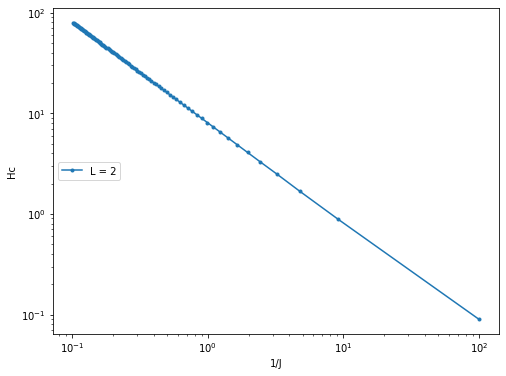

In [99]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

ax.plot(data_criticaldropletH[0], data_criticaldropletH[1], label='L = 2', marker='.')

plt.ylabel("Hc")
plt.xlabel("1/J")
plt.ticklabel_format(axis="x", style='sci', scilimits=(0,0))
ax.set_yscale('log')
ax.set_xscale('log')
#plt.xlim(0.5, 12)
#plt.ylim(0, 0.000001)
ax.legend(loc=6)

plt.show()

In [120]:
def Hysteresis(j_input, L_input):
    
    H_list = [[],[]]
    M_list = [[],[]]
    
    Mn = [[1, 1, -2], [1, 1, 2]]
    
    n = int(np.log2(L_input)-1)
    
    for k in range(2):
        
        hi = -4
        while hi <= 4:
            h = hi
            j = j_input
            U = np.identity(3)
            U = _eigen*np.dot(RecursionMatrix_1(j, h), U)
            j, h = J_1(j,h), H_1(j,h)
            for i in range(n):
                U = _eigen*np.dot(RecursionMatrix(j, h), U)
                j, h = J(j,h), H(j,h)
            M = np.dot(Mn[k], U)
            
            M_list[k].append(M[2])
            H_list[k].append(hi)
            hi = hi + 0.01
    

    return H_list, M_list

In [121]:
j = 1/5
L_values = [2, 4, 8, 16, 32]
loopx0_H, loopy0_H = Hysteresis(j, L_values[0])
loopx1_H, loopy1_H = Hysteresis(j, L_values[1])
loopx2_H, loopy2_H = Hysteresis(j, L_values[2])
loopx3_H, loopy3_H = Hysteresis(j, L_values[3])
loopx4_H, loopy4_H = Hysteresis(j, L_values[4])

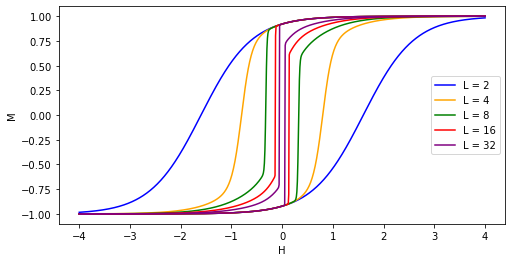

In [129]:
fig = plt.figure(figsize=(8, 4))
ax = plt.subplot(111)

colors = ['blue', 'orange', 'green', 'red', 'purple']

ax.plot(loopx0_H[0], loopy0_H[0], color=colors[0], label='L = '+str(L_values[0]))
ax.plot(loopx0_H[1], loopy0_H[1], color=colors[0])
ax.plot(loopx1_H[0], loopy1_H[0], color=colors[1], label='L = '+str(L_values[1]))
ax.plot(loopx1_H[1], loopy1_H[1], color=colors[1])
ax.plot(loopx2_H[0], loopy2_H[0], color=colors[2], label='L = '+str(L_values[2]))
ax.plot(loopx2_H[1], loopy2_H[1], color=colors[2])
ax.plot(loopx3_H[0], loopy3_H[0], color=colors[3], label='L = '+str(L_values[3]))
ax.plot(loopx3_H[1], loopy3_H[1], color=colors[3])
ax.plot(loopx4_H[0], loopy4_H[0], color=colors[4], label='L = '+str(L_values[4]))
ax.plot(loopx4_H[1], loopy4_H[1], color=colors[4])

plt.ylabel("M")
plt.xlabel("H")
#plt.xlim(-4, 4)
#plt.ylim(-1.1, 1.1)
ax.legend(loc=5)
#ax.grid()
plt.show()

In [313]:
Loop0y_0 = loopy0_H[0]
Loop0y_1 = loopy0_H[1]
Loop0x_0 = loopx0_H[0]
Loop0x_1 = loopx0_H[1]
list(np.array(Loop0y_0)+1)
list(np.array(Loop0y_1)+1)

loop_area = []
loop_area1, loop_area2 = 0, 0
for i in range(len(Loop0x_1)-1):
    loop_area1 = loop_area1 +  ((Loop0y_1[i]) * (Loop0x_1[i+1]-Loop0x_1[i]))
for i in range(len(Loop0x_0)-1):
    loop_area2 = loop_area2 +  ((Loop0y_0[i]) * (Loop0x_0[i+1]-Loop0x_0[i]))
loop_area.append(loop_area1-loop_area2)


Loop1y_0 = loopy1_H[0]
Loop1y_1 = loopy1_H[1]
Loop1x_0 = loopx1_H[0]
Loop1x_1 = loopx1_H[1]
list(np.array(Loop1y_0)+1)
list(np.array(Loop1y_1)+1)

loop_area1, loop_area2 = 0, 0
for i in range(len(Loop1x_1)-1):
    loop_area1 = loop_area1 +  ((Loop1y_1[i]) * (Loop1x_1[i+1]-Loop1x_1[i]))
for i in range(len(Loop1x_0)-1):
    loop_area2 = loop_area2 +  ((Loop1y_0[i]) * (Loop1x_0[i+1]-Loop1x_0[i]))
loop_area.append(loop_area1-loop_area2)


Loop2y_0 = loopy2_H[0]
Loop2y_1 = loopy2_H[1]
Loop2x_0 = loopx2_H[0]
Loop2x_1 = loopx2_H[1]
list(np.array(Loop2y_0)+1)
list(np.array(Loop2y_1)+1)

loop_area1, loop_area2 = 0, 0
for i in range(len(Loop2x_1)-1):
    loop_area1 = loop_area1 +  ((Loop2y_1[i]) * (Loop2x_1[i+1]-Loop2x_1[i]))
for i in range(len(Loop1x_0)-1):
    loop_area2 = loop_area2 +  ((Loop2y_0[i]) * (Loop2x_0[i+1]-Loop2x_0[i]))
loop_area.append(loop_area1-loop_area2)


Loop3y_0 = loopy3_H[0]
Loop3y_1 = loopy3_H[1]
Loop3x_0 = loopx3_H[0]
Loop3x_1 = loopx3_H[1]
list(np.array(Loop3y_0)+1)
list(np.array(Loop3y_1)+1)

loop_area1, loop_area2 = 0, 0
for i in range(len(Loop3x_1)-1):
    loop_area1 = loop_area1 +  ((Loop3y_1[i]) * (Loop3x_1[i+1]-Loop3x_1[i]))
for i in range(len(Loop1x_0)-1):
    loop_area2 = loop_area2 +  ((Loop3y_0[i]) * (Loop3x_0[i+1]-Loop3x_0[i]))
loop_area.append(loop_area1-loop_area2)



Loop4y_0 = loopy4_H[0]
Loop4y_1 = loopy4_H[1]
Loop4x_0 = loopx4_H[0]
Loop4x_1 = loopx4_H[1]
list(np.array(Loop4y_0)+1)
list(np.array(Loop4y_1)+1)

loop_area1, loop_area2 = 0, 0
for i in range(len(Loop4x_1)-1):
    loop_area1 = loop_area1 +  ((Loop4y_1[i]) * (Loop4x_1[i+1]-Loop4x_1[i]))
for i in range(len(Loop1x_0)-1):
    loop_area2 = loop_area2 +  ((Loop4y_0[i]) * (Loop4x_0[i+1]-Loop4x_0[i]))
loop_area.append(loop_area1-loop_area2)

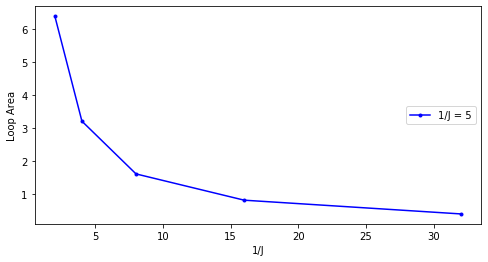

In [315]:
T_values = []
for i in range(len(j_values)):
    T_values.append(1/j_values[i])

fig = plt.figure(figsize=(8, 4))
ax = plt.subplot(111)

colors = ['blue', 'orange', 'green', 'red', 'purple']

ax.plot(L_values, loop_area, color=colors[0], label='1/J = 5', marker='.')


plt.ylabel("Loop Area")
plt.xlabel("1/J")
#plt.xlim(-3, 3)
#plt.ylim(-1, 1)
ax.legend(loc=5)

plt.show()

In [266]:
L = 32
j_values = [1/0.2, 1/0.5, 1/1, 1/2, 1/5]
loopx0_T, loopy0_T = Hysteresis(j_values[0], L)
loopx1_T, loopy1_T = Hysteresis(j_values[1], L)
loopx2_T, loopy2_T = Hysteresis(j_values[2], L)
loopx3_T, loopy3_T = Hysteresis(j_values[3], L)
loopx4_T, loopy4_T = Hysteresis(j_values[4], L)

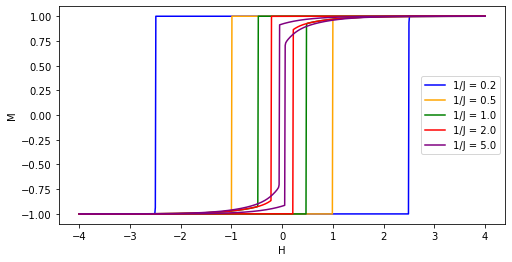

In [285]:
fig = plt.figure(figsize=(8, 4))
ax = plt.subplot(111)

colors = ['blue', 'orange', 'green', 'red', 'purple']

ax.plot(loopx0_T[0], loopy0_T[0], color=colors[0], label='1/J = '+str(1/j_values[0]))
ax.plot(loopx0_T[1], loopy0_T[1], color=colors[0])
ax.plot(loopx1_T[0], loopy1_T[0], color=colors[1], label='1/J = '+str(1/j_values[1]))
ax.plot(loopx1_T[1], loopy1_T[1], color=colors[1])
ax.plot(loopx2_T[0], loopy2_T[0], color=colors[2], label='1/J = '+str(1/j_values[2]))
ax.plot(loopx2_T[1], loopy2_T[1], color=colors[2])
ax.plot(loopx3_T[0], loopy3_T[0], color=colors[3], label='1/J = '+str(1/j_values[3]))
ax.plot(loopx3_T[1], loopy3_T[1], color=colors[3])
ax.plot(loopx4_T[0], loopy4_T[0], color=colors[4], label='1/J = '+str(1/j_values[4]))
ax.plot(loopx4_T[1], loopy4_T[1], color=colors[4])

plt.ylabel("M")
plt.xlabel("H")
#plt.xlim(-3, 3)
#plt.ylim(-1, 1)
ax.legend(loc=5)

plt.show()

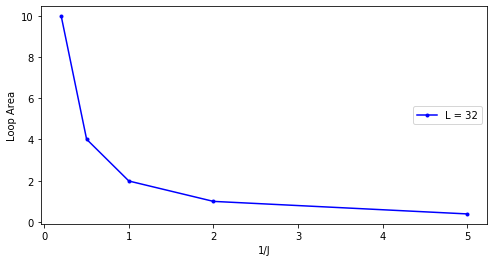

In [311]:
T_values = []
for i in range(len(j_values)):
    T_values.append(1/j_values[i])

fig = plt.figure(figsize=(8, 4))
ax = plt.subplot(111)

colors = ['blue', 'orange', 'green', 'red', 'purple']

ax.plot(T_values, loop_area, color=colors[0], label='L = 32', marker='.')


plt.ylabel("Loop Area")
plt.xlabel("1/J")
#plt.xlim(-3, 3)
#plt.ylim(-1, 1)
ax.legend(loc=5)

plt.show()

In [284]:
Loop0y_0 = loopy0_T[0]
Loop0y_1 = loopy0_T[1]
Loop0x_0 = loopx0_T[0]
Loop0x_1 = loopx0_T[1]
list(np.array(Loop0y_0)+1)
list(np.array(Loop0y_1)+1)
loop_area = []
loop_area1, loop_area2 = 0, 0
for i in range(len(Loop0x_1)-1):
    loop_area1 = loop_area1 +  ((Loop0y_1[i]) * (Loop0x_1[i+1]-Loop0x_1[i]))
for i in range(len(Loop0x_0)-1):
    loop_area2 = loop_area2 +  ((Loop0y_0[i]) * (Loop0x_0[i+1]-Loop0x_0[i]))
loop_area.append(loop_area1-loop_area2)


Loop1y_0 = loopy1_T[0]
Loop1y_1 = loopy1_T[1]
Loop1x_0 = loopx1_T[0]
Loop1x_1 = loopx1_T[1]
list(np.array(Loop1y_0)+1)
list(np.array(Loop1y_1)+1)

loop_area1, loop_area2 = 0, 0
for i in range(len(Loop1x_1)-1):
    loop_area1 = loop_area1 +  ((Loop1y_1[i]) * (Loop1x_1[i+1]-Loop1x_1[i]))
for i in range(len(Loop1x_0)-1):
    loop_area2 = loop_area2 +  ((Loop1y_0[i]) * (Loop1x_0[i+1]-Loop1x_0[i]))
loop_area.append(loop_area1-loop_area2)



Loop2y_0 = loopy2_T[0]
Loop2y_1 = loopy2_T[1]
Loop2x_0 = loopx2_T[0]
Loop2x_1 = loopx2_T[1]
list(np.array(Loop2y_0)+1)
list(np.array(Loop2y_1)+1)

loop_area1, loop_area2 = 0, 0
for i in range(len(Loop2x_1)-1):
    loop_area1 = loop_area1 +  ((Loop2y_1[i]) * (Loop2x_1[i+1]-Loop2x_1[i]))
for i in range(len(Loop1x_0)-1):
    loop_area2 = loop_area2 +  ((Loop2y_0[i]) * (Loop2x_0[i+1]-Loop2x_0[i]))
loop_area.append(loop_area1-loop_area2)




Loop3y_0 = loopy3_T[0]
Loop3y_1 = loopy3_T[1]
Loop3x_0 = loopx3_T[0]
Loop3x_1 = loopx3_T[1]
list(np.array(Loop3y_0)+1)
list(np.array(Loop3y_1)+1)

loop_area1, loop_area2 = 0, 0
for i in range(len(Loop3x_1)-1):
    loop_area1 = loop_area1 +  ((Loop3y_1[i]) * (Loop3x_1[i+1]-Loop3x_1[i]))
for i in range(len(Loop3x_0)-1):
    loop_area2 = loop_area2 +  ((Loop3y_0[i]) * (Loop3x_0[i+1]-Loop3x_0[i]))
loop_area.append(loop_area1-loop_area2)


Loop4y_0 = loopy4_T[0]
Loop4y_1 = loopy4_T[1]
Loop4x_0 = loopx4_T[0]
Loop4x_1 = loopx4_T[1]
list(np.array(Loop4y_0)+1)
list(np.array(Loop4y_1)+1)

loop_area1, loop_area2 = 0, 0
for i in range(len(Loop4x_1)-1):
    loop_area1 = loop_area1 +  ((Loop4y_1[i]) * (Loop4x_1[i+1]-Loop4x_1[i]))
for i in range(len(Loop4x_0)-1):
    loop_area2 = loop_area2 +  ((Loop4y_0[i]) * (Loop4x_0[i+1]-Loop4x_0[i]))
loop_area.append(loop_area1-loop_area2)